In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing the datasets as Panda dataframes
corona = pd.read_csv("./Data/novel-corona-virus-2019-dataset/covid_19_data.csv")
df_deaths = pd.read_csv("./Data/Deaths due to Coronavirus in India.csv", header = None)
df_cases = pd.read_csv("./Data/Coronavirus cases in India.csv", header = None)
df_district = pd.read_csv("./Data/Corona virus in India, district wise.csv", header = None)

In [2]:
# printing the total number of cases worldwide
corona["Province/State"].replace('', np.nan, inplace=True)
print("Total number of cases worldwide: " + str(len(corona)))

# printing some statistics about the cases in India
confirmed = 0
rec = 0
deaths = 0
date = []
patients = []

for index, row in corona.iterrows(): 
    if row["Country/Region"] == "India":
        confirmed = row["Confirmed"]
        rec = row["Recovered"]
        deaths = row["Deaths"]
        if row["ObservationDate"] not in date and row["Confirmed"] not in patients:
            date.append(row["ObservationDate"])
        if row["Confirmed"] not in patients:
            patients.append(row["Confirmed"])
        
print("There have been a total of " + str(int(confirmed)) + " cases in India. " + "Although " + str(int(rec)) + " patients have recovered, " + str(int(deaths)) + " have died.")

# clearing the memory
del rec
del deaths

Total number of cases worldwide: 9735
There have been a total of 987 cases in India. Although 84 patients have recovered, 24 have died.


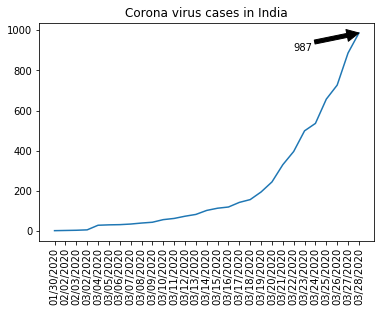

In [3]:
# plotting the number of cases versus date in India
plt.plot(date, patients)
plt.xticks(date, date, rotation = 'vertical')
plt.annotate(str(int(confirmed)), xy = (date[-1], int(confirmed)), xytext = (22, 900), arrowprops = dict(facecolor = 'black', shrink = 0),)
plt.title("Corona virus cases in India")
plt.show()

# clearing the memory
del confirmed
del date
del patients

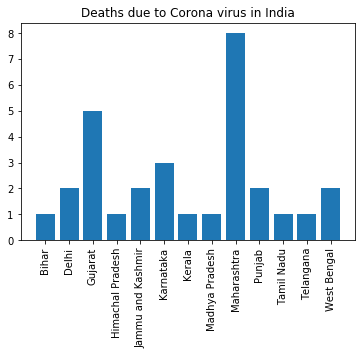

In [4]:
# plotting the number of deaths, state wise, in India
df_deaths.sort_values(by=[0], inplace = True, ascending = True)
plt.bar(df_deaths[0], df_deaths[1])
plt.xticks(df_deaths[0], df_deaths[0], rotation = 'vertical')
plt.title("Deaths due to Corona virus in India")
plt.show()

# clearing the memory
del df_deaths

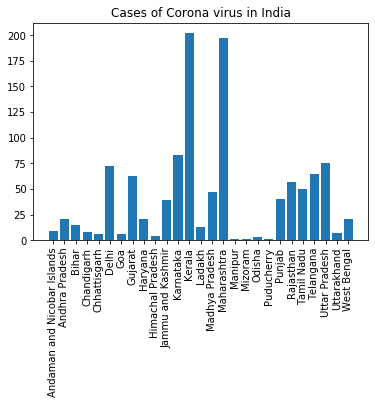

In [5]:
# plotting the number of cases, state wise, in India
df_cases.sort_values(by=[0], inplace = True, ascending = True)
plt.bar(df_cases[0], df_cases[1])
plt.xticks(df_cases[0], df_cases[0], rotation = 'vertical')
plt.title("Cases of Corona virus in India")
plt.show()

# clearing the memory
del df_cases

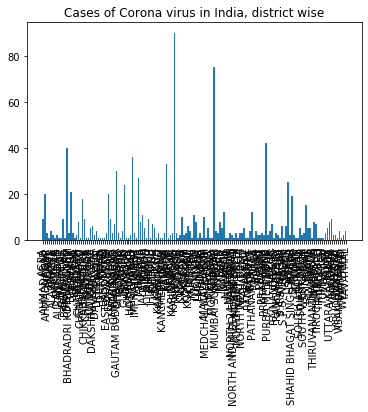

In [6]:
# plotting the number of cases, district wise, in India
indices = []

for index, row in df_district.iterrows():
    if row[0] == "UNKNOWN":
        indices.append(index)

df_district = df_district.drop(indices)

df_district.sort_values(by=[0], inplace = True, ascending = True)
plt.bar(df_district[0], df_district[1])
plt.xticks(df_district[0], df_district[0], rotation = 'vertical')
plt.title("Cases of Corona virus in India, district wise")
plt.show()

# clearing the memory
del indices

In [7]:
# finding the latitudes and longitudes for each district in the dataset
from  geopy.geocoders import Nominatim

geolocator = Nominatim()
lat_lon = []

for j in range(len(df_district[0])):
    try:
        city = df_district[0][j]
        loc = geolocator.geocode(df_district[0][j] + ",India")
        lat_lon.append((df_district[0][j], loc.latitude, loc.longitude))
    except KeyError:
        print("KeyError with " + city)
    except AttributeError:
        print("AttributeError with " + city)
        
# clearing the memory
del geolocator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


KeyError with AURANGABAD
KeyError with DELHI
KeyError with BAGHPAT
KeyError with MEDCHAL MALKAJGIRI
KeyError with KACHCHH
KeyError with PRATAPGARH
KeyError with GWALIOR
AttributeError with BANDIPORE
AttributeError with BARAMULLAB
KeyError with BARAMULLAB
AttributeError with SHAHID BHAGAT SINGH NAGAR
KeyError with LUDHIANA
AttributeError with S.P.S. NELLORE
KeyError with CHITTOOR
KeyError with NALANDA
KeyError with NORTH AND MIDDLE ANDAMAN


In [8]:
# finding the distances between the districts with cases
from geopy.distance import great_circle

distances = []

for i in range(len(lat_lon)):
    for j in range(i + 1, len(lat_lon)):
        try:
            #print(str(lat_lon[i][0]) + "\t" + str(lat_lon[j][0]) + "\t" + str(great_circle(lat_lon[j][1], lat_lon[j][2]).km))
            distances.append(great_circle(lat_lon[j][1], lat_lon[j][2]).km)
        except ValueError:
            print(lat_lon[i][0] + " and " + lat_lon[j][0] + " have ValueError.")
            
print("\nNumber of distances between districts: " + str(len(distances)) + "\n")
print(distances)

# clearing the memory
del lat_lon

/home/vaibhav/.local/lib/python3.6/site-packages/geopy/distance.py:304: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  a, b = Point(a), Point(b)


MUMBAI and SOUTH ANDAMAN have ValueError.
MUMBAI and NORTH AND MIDDLE ANDAMAN have ValueError.
PUNE and SOUTH ANDAMAN have ValueError.
PUNE and NORTH AND MIDDLE ANDAMAN have ValueError.
SANGLI and SOUTH ANDAMAN have ValueError.
SANGLI and NORTH AND MIDDLE ANDAMAN have ValueError.
NAGPUR and SOUTH ANDAMAN have ValueError.
NAGPUR and NORTH AND MIDDLE ANDAMAN have ValueError.
THANE and SOUTH ANDAMAN have ValueError.
THANE and NORTH AND MIDDLE ANDAMAN have ValueError.
YAVATMAL and SOUTH ANDAMAN have ValueError.
YAVATMAL and NORTH AND MIDDLE ANDAMAN have ValueError.
MUMBAI SUBURBAN and SOUTH ANDAMAN have ValueError.
MUMBAI SUBURBAN and NORTH AND MIDDLE ANDAMAN have ValueError.
AHMADNAGAR and SOUTH ANDAMAN have ValueError.
AHMADNAGAR and NORTH AND MIDDLE ANDAMAN have ValueError.
SATARA and SOUTH ANDAMAN have ValueError.
SATARA and NORTH AND MIDDLE ANDAMAN have ValueError.
KOLHAPUR and SOUTH ANDAMAN have ValueError.
KOLHAPUR and NORTH AND MIDDLE ANDAMAN have ValueError.
RATNAGIRI and SOUTH AN